In [39]:
#Import libraries
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LinearRegression
import ast
import seaborn as sns
from adjustText import adjust_text

#Load the CSV file into a DataFrame
df = pd.read_csv('lego_sets.csv')

#Clean data
df.drop(columns=['bricksetURL', 'thumbnailURL', 'imageURL'], inplace=True)
df['pieces'] = df['pieces'].fillna(0).astype(int)
df['minifigs'] = df['minifigs'].fillna(0).astype(int)
df['year'] = df['year'].astype(int)
df['pieces'] = df['pieces'].astype(int)
df['minifigs'] = df['minifigs'].astype(int)
df['US_retailPrice'] = pd.to_numeric(df['US_retailPrice'], errors='coerce')
df['US_retailPrice'] = df['US_retailPrice'].fillna(0)
df['agerange_min'] = df['agerange_min'].fillna(0)

#Create new df with missing values removed from relevant columns
df_full = df[(df['pieces'] > 0) & (df['minifigs'] > 0) & (df['US_retailPrice'] > 0)]

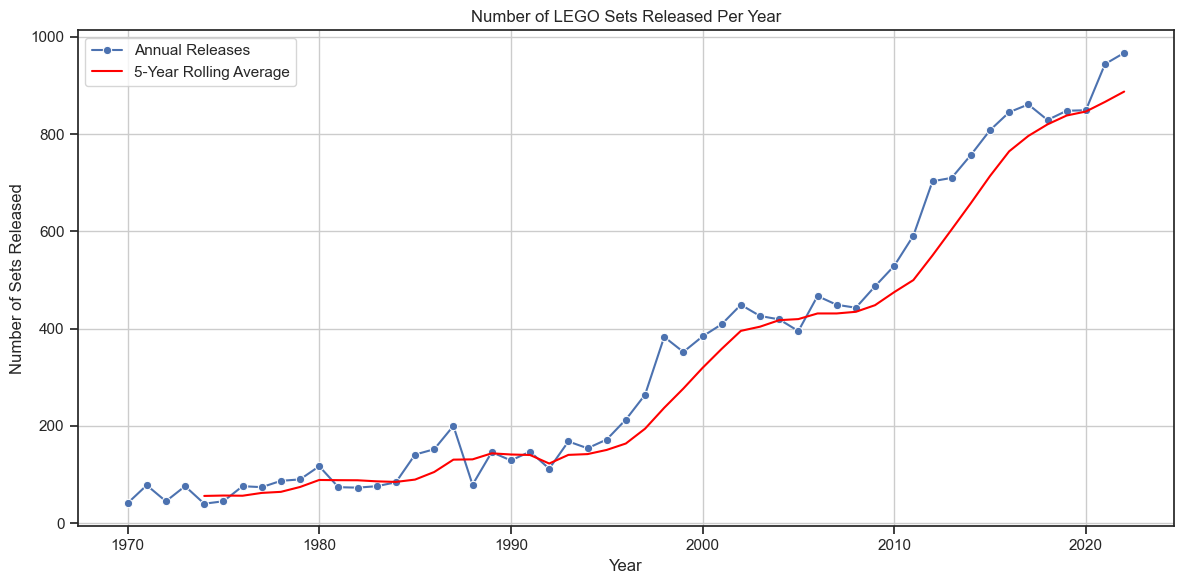

In [47]:
# Calculate a rolling average and set count
sets_per_year = df.groupby('year').size().reset_index(name='set_count')
sets_per_year['rolling_avg'] = sets_per_year['set_count'].rolling(window=5).mean()

# Plot
sns.set_theme(style='ticks')
plt.figure(figsize=(12, 6))
sns.lineplot(data=sets_per_year, x='year', y='set_count', label='Annual Releases', marker='o')
sns.lineplot(data=sets_per_year, x='year', y='rolling_avg', label='5-Year Rolling Average', color='red')

plt.title('Number of LEGO Sets Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


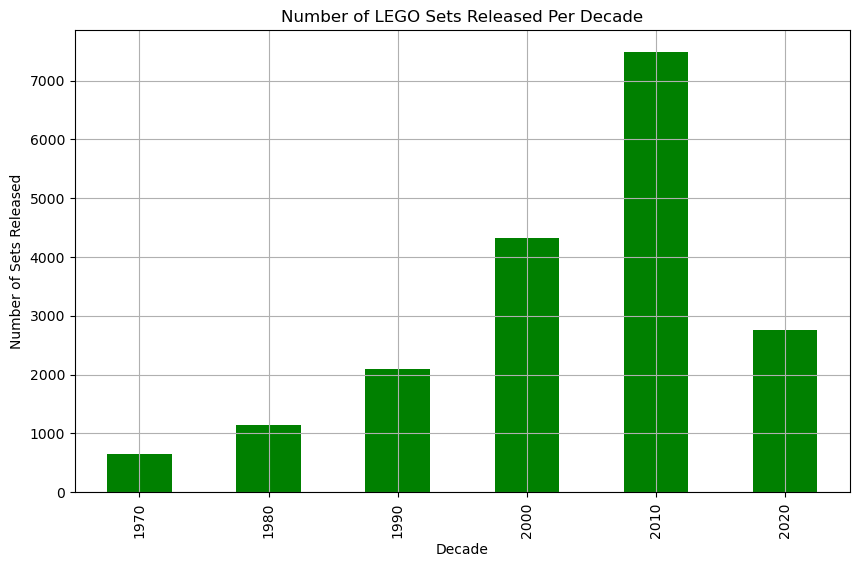

In [41]:


# Plot the decade trend
plt.figure(figsize=(10, 6))
sets_per_decade.plot(kind='bar', color='green')
plt.title('Number of LEGO Sets Released Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Sets Released')
plt.grid(True)
plt.show()

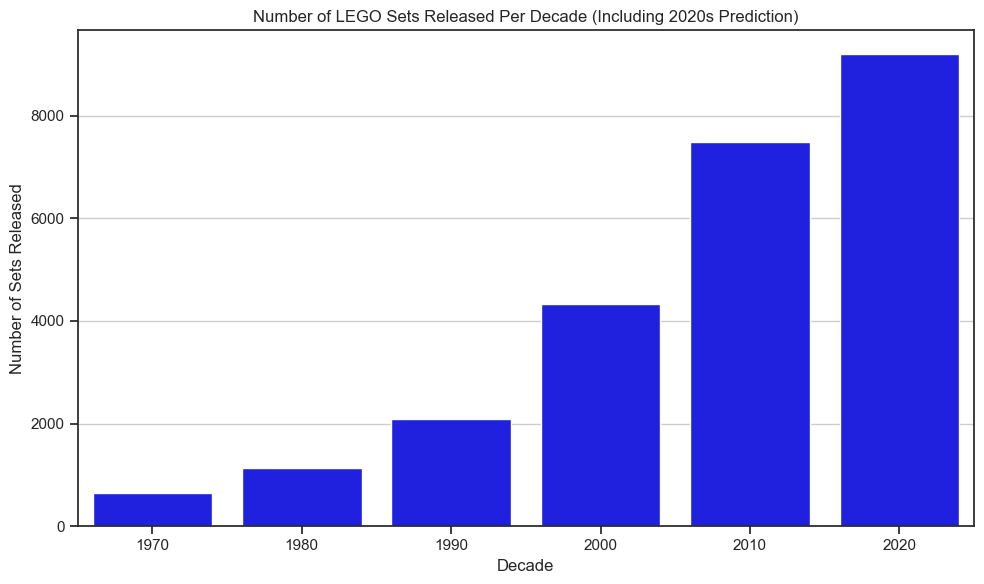

In [64]:
# Create a new column for decade
df['decade'] = (df['year'] // 10) * 10

# Count the number of sets released each decade
sets_per_decade = df.groupby('decade').size()

# Filter for 2020–2022
recent_years = df[df['year'].between(2020, 2022)]

# Average sets released per year from 2020 to 2022
avg_recent = recent_years.groupby('year').size().mean()

# Predict total for 2020s (2020–2029 = 10 years)
predicted_total_2020s = round(avg_recent * 10)

# Add predicted 2020s total to sets_per_decade
sets_per_decade_pred = sets_per_decade.copy()
sets_per_decade_pred.loc[2020] = predicted_total_2020s
# Set up data for plot
sets_per_decade_pred = sets_per_decade_pred.reset_index()
sets_per_decade_pred.columns = ['decade', 'set_count']
sets_per_decade_pred.sort_values('decade', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sets_per_decade_pred.sort_index(), x='decade', y='set_count', color='blue')
plt.title('Number of LEGO Sets Released Per Decade (Including 2020s Prediction)')
plt.xlabel('Decade')
plt.ylabel('Number of Sets Released')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()